# `Spaceship_Titanic`

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

`Load Dataset`

In [3]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
print("Train_df shape:",train_df.shape)
print("Test_df shape:",test_df.shape)

Train_df shape: (8693, 14)
Test_df shape: (4277, 13)


`Review first and last few lines`

In [4]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


`Statistical Analysis`

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


`About Dataset`
- mean on Age is 28.827930
- minimum value in Age column is 0.0
- maximum Age in Age column is 79.0

`Handling missing values`

In [8]:
train_df.drop_duplicates()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [9]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
from sklearn.impute import KNNImputer,SimpleImputer

# KNNImputer to impute numeric values
knn=KNNImputer(n_neighbors=100)
for col in train_df.select_dtypes(include="Float64").columns:
    train_df[col]=knn.fit_transform(train_df[[col]])

# SimpleImputer to impute object values
simpleimputer=SimpleImputer(strategy="most_frequent")
for col in train_df.select_dtypes(include="object").columns:
    train_df[col] = simpleimputer.fit_transform(train_df[[col]]).ravel()

In [11]:
train_df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

`Visualization Analysis`

In [12]:
def countplot(column):
    sns.countplot(x=column,data=train_df,color="gray")
    plt.title(f"{column.name} Visualization")
    plt.show()

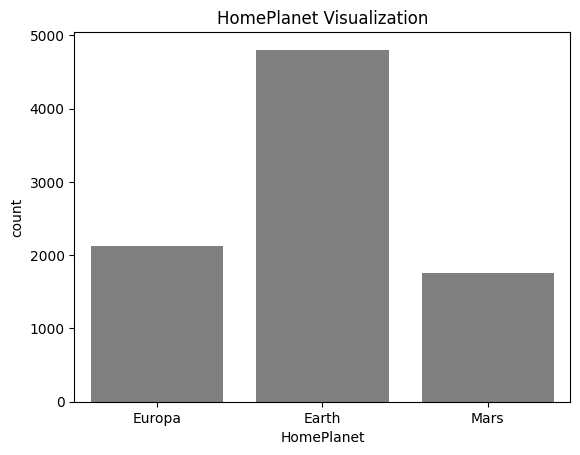

In [13]:
countplot(train_df["HomePlanet"])

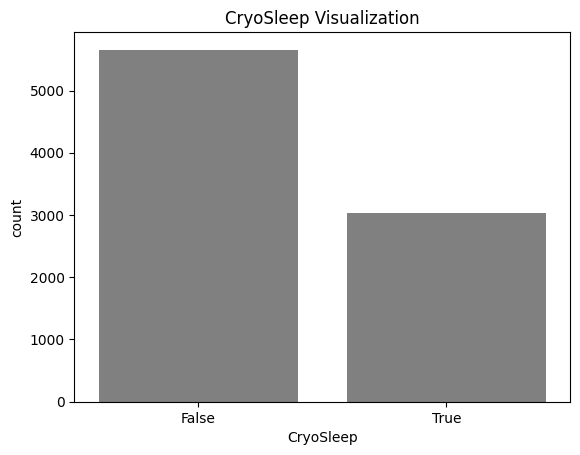

In [14]:
countplot(train_df["CryoSleep"])

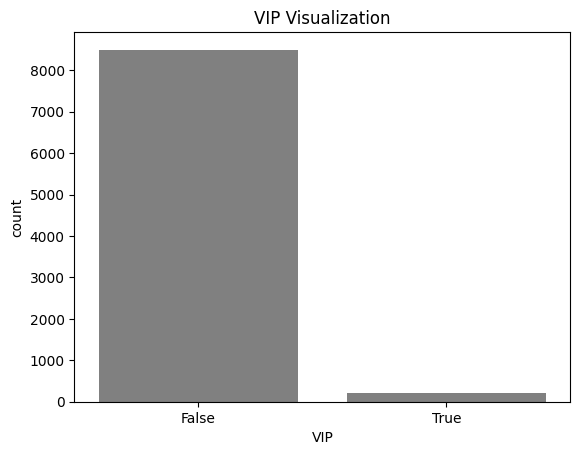

In [15]:
countplot(train_df["VIP"])

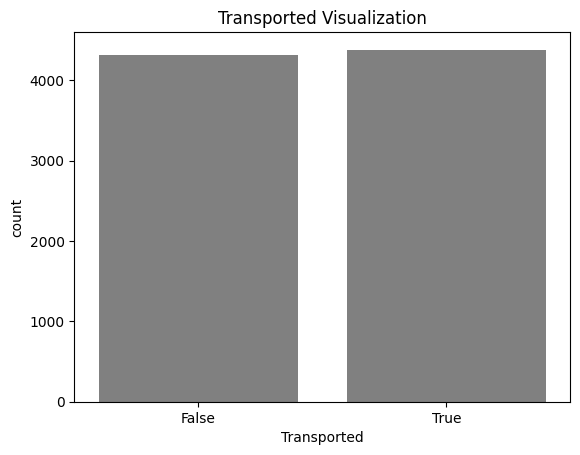

In [16]:
countplot(train_df["Transported"])

In [17]:
def histplot(column):
    sns.histplot(column,color="black",kde=True)
    plt.title(f"{column.name} distribution")
    plt.show()

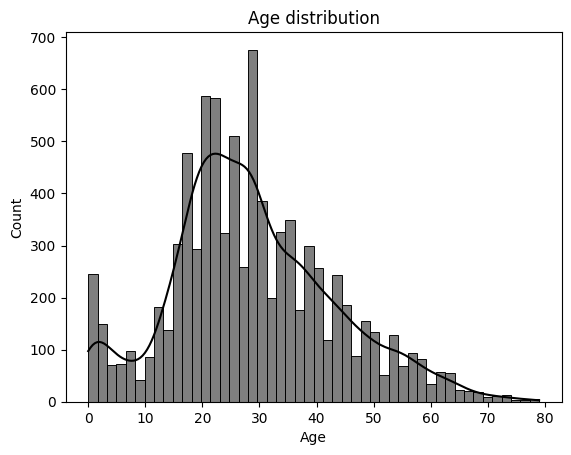

In [18]:
histplot(train_df["Age"])

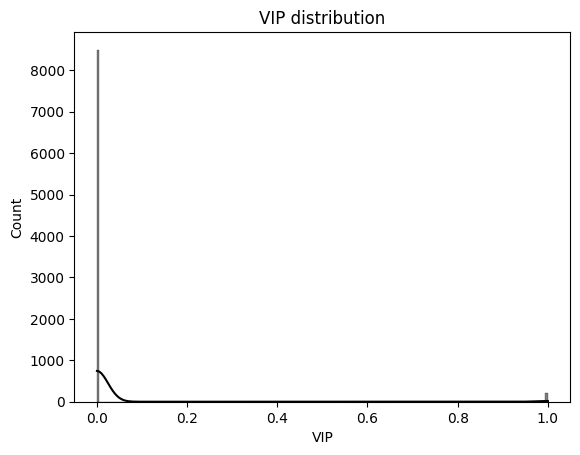

In [19]:
histplot(train_df["VIP"])

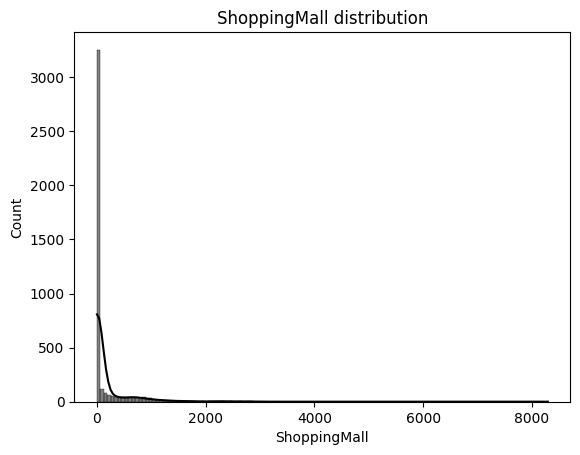

In [20]:
histplot(test_df["ShoppingMall"])

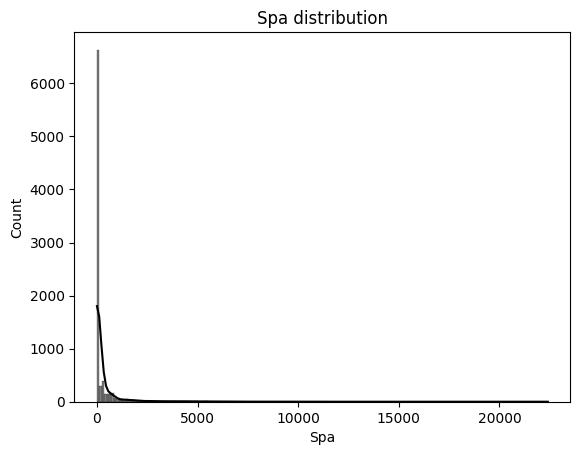

In [21]:
histplot(train_df["Spa"])

`Encode our category columns`

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# Process train_df
for col in test_df.select_dtypes(include="object").columns:
    test_df[col]=le.fit_transform(test_df[[col]])

# Process test_df
object_columns = train_df.select_dtypes(include="object").columns
column = [col for col in object_columns if col != 'Transported']
for col in column:
    train_df[col]=le.fit_transform(train_df[[col]])

`Transform Our data`

In [23]:
from sklearn.preprocessing import QuantileTransformer,PowerTransformer
# transfer = PowerTransformer(method="yeo-johnson")
transfer = QuantileTransformer()

column = ["VIP", "Spa", "ShoppingMall"]
for col in column:
    train_df[col] = transfer.fit_transform(train_df[[col]])

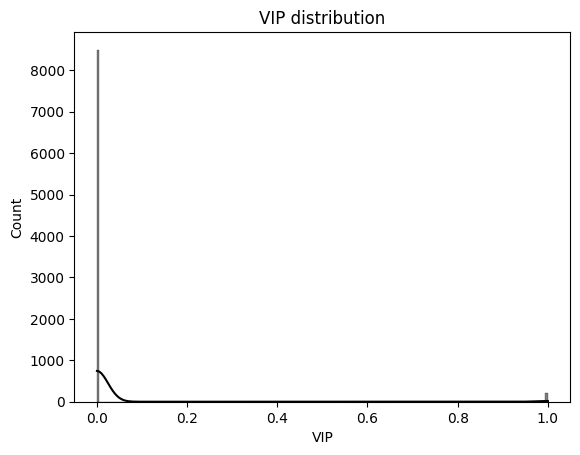

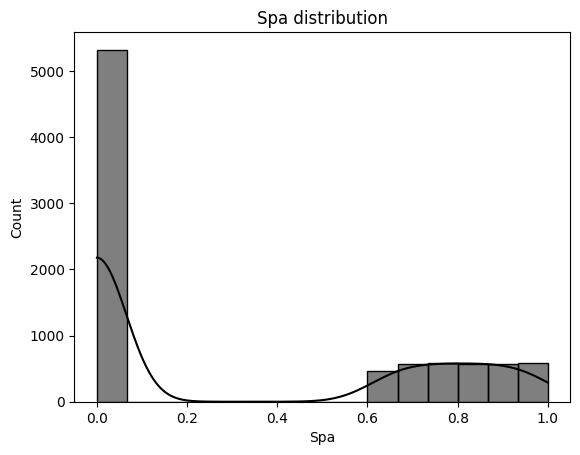

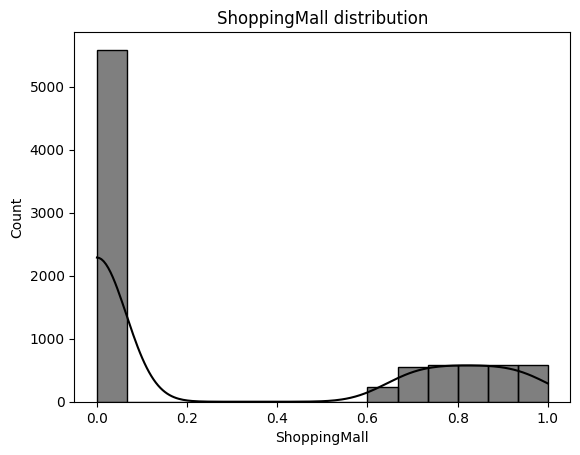

In [24]:
for col in column:
    histplot(train_df[col])

`Feature Selection`

In [25]:
x=train_df.drop(columns=["PassengerId","Transported"],axis=1)
y=train_df["Transported"]

`Train Test Split`

In [26]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

`Fit Model`

In [27]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'reg_lambda': [1, 3, 5, 7, 9],
    }
grid_search = GridSearchCV(estimator=xgb, 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-2, 
                           scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'reg_lambda': 7}


In [28]:
best_xgb = grid_search.best_estimator_
xgb_best=XGBClassifier(**grid_search.best_params_)
xgb_best.fit(x_train, y_train)
y_pred=xgb_best.predict(x_test)

`Metrics`

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy_score: ",accuracy_score(y_pred,y_test))
print("confusion_matrix:\n ",confusion_matrix(y_pred,y_test))

accuracy_score:  0.7908045977011494
confusion_matrix:
  [[338  77]
 [105 350]]


`Result`

In [30]:
test_features = test_df.drop('PassengerId', axis=1)
submission = xgb_best.predict(test_features)

# Create submission dataframe
sample_submission = pd.DataFrame({
    "PassengerId": test_df.PassengerId,
    "Transported": submission.astype(bool)
})
sample_submission

,PassengerId,Transported
0,0,True
1,1,False
2,2,True
3,3,False
4,4,True
...,...,...
4272,4272,True
4273,4273,False
4274,4274,True
4275,4275,True


In [40]:
sample_submission.to_csv("sample_submission.csv", index=False)